In [1]:
import sys
sys.path.append('../')
import train
from model import *
from lib.training import *
from lib.preprocessing import *
from lib.dataloading import *
from lib.loss_functions import *
from lib.evaluation import *
from torchvision import transforms
from torch import optim, nn
import random

In [2]:
%matplotlib inline

In [3]:
transform = get_transformer_norm()
dataset = SSIDataset(inpaint = True, rand = 'uniform', transform= transform['val'])
dataloader = torch.utils.data.DataLoader(dataset)
dataiter = iter(dataloader)

In [4]:
d_net = CENet()
d_net.load_state_dict(torch.load('/mnt/Liver/GE_study_hri/hri-scripts/pretrain-models/nop-d-uni2-best.pth'))

<All keys matched successfully>

In [14]:
nod_net = CENet()
nod_net.load_state_dict(torch.load('/mnt/Liver/GE_study_hri/hri-scripts/pretrain-models/nop-nod-uni3-last.pth'))

<All keys matched successfully>

In [15]:
def tensor2numpy(img):
    img = np.rollaxis(np.squeeze(img.detach().numpy()), 0 ,3)
    img = (img - np.min(img))/(np.max(img) - np.min(img))
    return img

def combine_numpy(img, center):
    img[64:192, 100:300, :] = center
    return img

def combine_tensor(img, center):
    img[:,:,64:192, 100:300] = center
    return img

def show_img(img, center):
    img = combine_tensor(img, center)
    return tensor2numpy(img)

In [31]:
i = random.randint(0, len(dataset))
img, center, label = dataset[i]
img = img.unsqueeze(0)
center = center.unsqueeze(0)

In [32]:
d_pred = d_net(img)
nod_pred = nod_net(img)

[None, None, None]

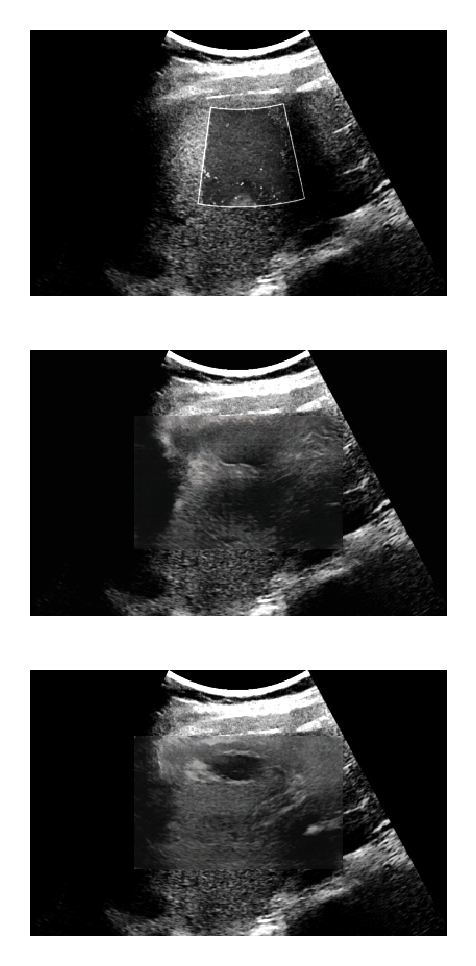

In [33]:
fig, axes = plt.subplots(nrows=3, dpi = 300)
axes[0].imshow(show_img(img, center))

axes[1].imshow(show_img(img, nod_pred))

axes[2].imshow(show_img(img, d_pred))

[ax.set_axis_off() for ax in axes]

In [7]:
file_count = 0
study_date = set()
for path, dirs, files in os.walk('/mnt/SSI_milking/'):        
        try:            
            ds = pydicom.dcmread(os.path.join(path,files[0]))            
            study_date.add(ds.StudyDate)            
            print(ds.StudyDate)
        except Exception as e:
            print(e)
        

File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.
list index out of range
list index out of range
list index out of range
20190307
20190823
list index out of range
20191022
list index out of range
20191007
20191029
20191112
20191126
list index out of range
list index out of range
20191003
list index out of range
20191017
list index out of range
20190213
20190812
list index out of range
20190102
20191025
list index out of range
20191121
list index out of range
20190222
20190417
20190418
list index out of range
20190304
20190214
list index out of range
20190321
20190702
list index out of range
20191113
list index out of range
20190405
20190924
20191101
list index out of range
20190719
list index out of range
20190118
20190219
20190118
20190107
20190123
20190128
20190109
20190

20191002
20190829
20190916
20190904
20190905
20190923
20190906
20190906
20190913
20190913
20190916
20191101
20191004
20191002
20191004
20191004
20191003
20191003
20191003
20191007
20191008
20191008
20191015
20191008
20191010
20191101
20191015
20191015
20191106
20191113
20191015
20191017
20191122
20191113
20191030
20191030
20191112
20191107
20191031
20191126
20191107
20191107
20191105
20191113
20191122
20191115
20191115
20191119
20191126
20191125
20191125
20190103
list index out of range
20190301
20190306
20190603
20190624
20190911
list index out of range
20190314
20190715
20190712
20190805
20191022
list index out of range
20190108
20190107
20190111
20190115
20190115
20190117
20190117
20190213
20190219
20190219
20190221
20190222
20190417
20190410
20190304
20190308
20190312
20190313
20190313
20190315
20190319
20190402
20190403
20190405
20190408
20190621
20190617
20190709
20190710
20190715
20190723
20190806
20190805
20190802
20190807
20190812
20190814
20190815
20190828
20190830
20190828
2

In [386]:
ds = pydicom.dcmread('/mnt/SSI_milking/Abdomen/General/US DRAINAGE CATHETER PLACEMENT/E13580834/I0000001')

In [13]:
pd.read_csv('../data/ssi.csv').ACC.nunique()

1188

In [387]:
ds.StudyDate

'20191003'

In [371]:
ssi = pd.read_csv('../data/ssi.csv')

In [372]:
ssi.shape

(12267, 6)

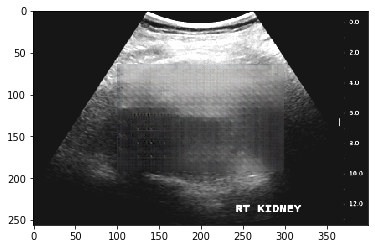

In [185]:
plt.imshow(show_img(img, nod_pred))

In [17]:
for study, encoding in study_dict.items():
    print(f'{study} & {",".join(encoding)} \\\\')

US BIOPSY LIVER NONFOCAL & liver,abdomen \\
US BIOPSY LIVER FOCAL & liver,abdomen \\
US LYMPH NODE BIOPSY & soft tissue,nodule \\
US BIOPSY KIDNEY NONFOCAL (EITHER SIDE) & kidney,abdomen \\
US PARACENTESIS THERAPEUTIC & abdomen,drainage \\
US BIOPSY TRANSPLANTED KIDNEY & kidney,abdomen \\
US PARACENTESIS DIAGNOSTIC AND THERAPEUTIC & abdomen,drainage \\
US THYROID BIOPSY & thyroid,nodule \\
US PARACENTESIS DIAGNOSTIC & abdomen,drainage \\
US THORACENTESIS DIAGNOSTIC AND THERAPEUTIC & chest,drainage \\
US THYROID ASPIRATION/FNA & thyroid,nodule \\
US DRAINAGE INTERVENTION NOT OTHERWISE SPECIFIED & soft tissue,drainage \\
US DRAINAGE ABDOMEN & abdomen,drainage \\
US DRAINAGE GALLBLADDER (CHOLECYSTOSTOMY) & abdomen,drainage \\
US THORACENTESIS THERAPEUTIC (RIGHT) & chest,drainage \\
US THORACENTESIS THERAPEUTIC (LEFT) & chest,drainage \\
US BIOPSY MESENTERY & abdomen,drainage,soft tissue \\
US NECK SOFT TISSUE BIOPSY & soft tissue,nodule \\
US DRAINAGE CATHETER PLACEMENT & soft tissue,drai